In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [3]:
data=pd.read_csv("australian.csv.dat")

In [4]:
data

,1,22.08,11.46,2,4,4.1,1.585,0,0.1,0.2,1.1,2.1,100,1213,0.3
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [5]:
data.columns = ["Feature1","Feature2", "feature3", "Feature4", "feature","Feature5","Feature6", "feature7", "Feature8",
               "Feature9","Feature10", "feature11", "Feature12","Feature13", "Target Feature"]

# The dataset has no titles and no info about the title was given

In [6]:
data

,Feature1,Feature2,feature3,Feature4,feature,Feature5,Feature6,feature7,Feature8,Feature9,Feature10,feature11,Feature12,Feature13,Target Feature
0,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
1,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
2,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
3,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
4,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
685,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
686,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
687,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
data.isna().sum()         # The datasset has no missing values so no need of replacing anything

Feature1          0
Feature2          0
feature3          0
Feature4          0
feature           0
Feature5          0
Feature6          0
feature7          0
Feature8          0
Feature9          0
Feature10         0
feature11         0
Feature12         0
Feature13         0
Target Feature    0
dtype: int64

In [9]:
X = data.iloc[:, :-1].values                       #Seperate the dataset into columns, Y is the target feature
Y = data.iloc[:, [-1]].values.reshape(-1)

In [7]:
Y

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,

d. Use min-max normalization to bring all features in similar range.


In [10]:
X =(X-X.min())/(X.max()-X.min())  

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)    # Split the data into training and test

In [12]:
from sklearn import svm                     #apply SVM model and train the model
clf = svm.SVC(kernel="linear", C=1)

clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [13]:
ypred = clf.predict(X_test)              #Predict the Test data

In [15]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0], dtype=int64)

In [16]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy = accuracy_score(y_test, ypred)

In [16]:
accuracy

0.5942028985507246

In [17]:
C = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 2, 3, 4, 5, 9, 10]
accuracy = []
for number in C:
    clf = svm.SVC(C=number)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuc = accuracy_score(y_test, ypred)
    accuracy.append(accuc)
    
    

<function matplotlib.pyplot.show(close=None, block=None)>

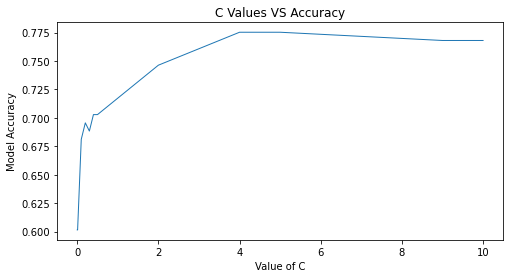

In [31]:
plt.figure(figsize=(8, 4))
plt.plot(C,accuracy, linewidth = 1)
plt.xlabel("Value of C")
plt.ylabel("Model Accuracy")
plt.title("C Values VS Accuracy")
plt.show

4. Does the accuracy change if the kernel function changes? Use Poly kernel as well as 
RBF kernel to check the accuracy

In [18]:
kernel = ["linear", "rbf","poly", "sigmoid"]
accuracy = []
for number in kernel:
    clf = svm.SVC(kernel=number)
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    accuc = accuracy_score(y_test, ypred)
    accuracy.append(accuc)
print(accuracy)

[0.5942028985507246, 0.6956521739130435, 0.6231884057971014, 0.6376811594202898]


The accuracy changes based on the kernel function